In [2]:
from utils import *

In [3]:
# from astroquery.gaia import Gaia

# # Query Gaia DR3 to select N random sources with given conditions
# # ---------------------------------------------------------------
# # For n = 1e+6 sources, the query might take ~10-15 min

# # n = number of random sources
# # mag_lim = limiting magnitude in G
# # blim = limiting |b|
# # par_sn = threshold in parallax S/N

# n = 1000000

# # Query
# # Make sure that commands inside the query do not stick together, print to check
# q = f"""
# SELECT TOP {n} * 
# FROM gaiadr3.gaia_source 
# ORDER BY source_id
# """

# # Run query
# job = Gaia.launch_job_async(q)
# r = job.get_results()

# # Save the query results to a local CSV file
# r.write('gaia_dr3.csv', overwrite=True)

In [4]:
# Load the compressed CSV file into a pandas dataframe
gaia_source = pd.read_csv('gaia_dr3_1_mil.csv')

In [5]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataframe to see all columns
gaia_source.head()

,solution_id,DESIGNATION,SOURCE_ID,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pm,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,nu_eff_used_in_astrometry,pseudocolour,pseudocolour_error,ra_pseudocolour_corr,dec_pseudocolour_corr,parallax_pseudocolour_corr,pmra_pseudocolour_corr,pmdec_pseudocolour_corr,astrometric_matched_transits,visibility_periods_used,astrometric_sigma5d_max,matched_transits,new_matched_transits,matched_transits_removed,ipd_gof_harmonic_amplitude,ipd_gof_harmonic_phase,ipd_frac_multi_peak,ipd_frac_odd_win,ruwe,scan_direction_strength_k1,scan_direction_strength_k2,scan_direction_strength_k3,scan_direction_strength_k4,scan_direction_mean_k1,scan_direction_mean_k2,scan_direction_mean_k3,scan_direction_mean_k4,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_bp_n_contaminated_transits,phot_bp_n_blended_transits,phot_rp_n_contaminated_transits,phot_rp_n_blended_transits,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_method_used,rv_nb_transits,rv_nb_deblended_transits,rv_visibility_periods_used,rv_expected_sig_to_noise,rv_renormalised_gof,rv_chisq_pvalue,rv_time_duration,rv_amplitude_robust,rv_template_teff,rv_template_logg,rv_template_fe_h,rv_atm_param_origin,vbroad,vbroad_error,vbroad_nb_transits,grvs_mag,grvs_mag_error,grvs_mag_nb_transits,rvs_spec_sig_to_noise,phot_variable_flag,l,b,ecl_lon,ecl_lat,in_qso_candidates,in_galaxy_candidates,non_single_star,has_xp_continuous,has_xp_sampled,has_rvs,has_epoch_photometry,has_epoch_rv,has_mcmc_gspphot,has_mcmc_msc,in_andromeda_survey,classprob_dsc_combmod_quasar,classprob_dsc_combmod_galaxy,classprob_dsc_combmod_star,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,azero_gspphot,azero_gspphot_lower,azero_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,ebpminrp_gspphot,ebpminrp_gspphot_lower,ebpminrp_gspphot_upper,libname_gspphot
0,1636148068921376768,Gaia DR3 4295806720,4295806720,545300884,2016.0,44.996155,0.101618,0.005615,0.101334,0.354331,0.122664,2.888632,12.616485,11.938352,0.137942,-4.080619,0.133170,0.122935,0.132028,-0.088910,0.022551,-0.365342,-0.036904,-0.244838,0.063012,0.135709,0.334337,184,0,183,1,2.672049,242.206970,0.380619,2.076508,31,False,1.508939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,16,0.217802,22,9,0,0.017597,90.239342,0,0,1.142952,0.307951,0.197659,0.430101,0.842078,-87.754784,-30.694550,-46.201908,30.174356,False,182,1653.394716,2.075764,796.523376,17.641426,18,800.429546,12.601409,63.519051,18.080235,20,1187.588004,15.823832,75.050598,17.061232,1.202385,0.0,0.0,0.0,2.0,0.0,1.019003,0.438808,0.580194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NOT_AVAILABLE,176.951076,-48.901521,42.533726,-16.329574,False,False,0,True,False,False,False,False,True,True,False,3.035489e-11,7.045791e-13,0.999988,5052.976074,5040.658203,5066.628418,4.7793,4.7613,4.7924,-1.4592,-1.5732,-1.3439,1497.054688,1466.734619,1536.132080,0.0064,0.0016,0.0176,0.0052,0.0013,0.0143,0.0028,0.0007,0.0078,MARCS
1,1636148068921376768,Gaia DR3 34361129088,34361129088,894504938,2016.0,45.004320,0.097320,0.021048,0.101753,3.235017,0.120450

In [12]:
def plot_distribution(column_name, ss, nss, ax, bins=100):
    """
    Plots the distribution of a specified column for ss and nss DataFrames.

    Parameters:
    - column_name: str, the name of the column to plot
    - ss: DataFrame, the DataFrame for single stars
    - nss: DataFrame, the DataFrame for non-single stars
    - gaia: DataFrame, the DataFrame for all stars
    - ax: Axes, the axes to plot on
    - bins: int, the number of bins for the histogram (default is 100)
    """
    # Drop NaN values
    ss = ss[column_name].dropna()
    nss = nss[column_name].dropna()
    
    ss_mean = ss.mean()
    nss_mean = nss.mean()
    
    ss_hist, ss_bins = np.histogram(ss, bins=bins, density=True)
    nss_hist, nss_bins = np.histogram(nss, bins=bins, density=True)
    
    ss_hist = ss_hist / ss_hist.max()
    nss_hist = nss_hist / nss_hist.max()
    
    ax.plot(ss_bins[:-1], ss_hist, drawstyle='steps-post', lw=2, label=f'cm (mean={ss_mean:.2f})', color='#FFD700', marker='*')
    ax.plot(nss_bins[:-1], nss_hist, drawstyle='steps-post', lw=2, label=f'ncm (mean={nss_mean:.2f})', color='k')
    
    ax.set_xlabel(column_name)
    ax.set_ylabel('Normalized Density')
    
    # Total counts
    total_ss = len(ss)
    total_nss = len(nss)
    
    # Add total counts to the legend
    ax.legend(title=f'Total Stars\ncm: {total_ss}, ncm: {total_nss}', fontsize='small', title_fontsize='small')
    
    # Set x-axis to logarithmic scale if max value is greater than 1000
    if ss_bins.max() > 90 or nss_bins.max() > 90:
        ax.set_xscale('log')

def plot_distributions(columns, ss, nss):
    """
    Creates subplots for specified columns to show their distributions for ss and nss DataFrames.

    Parameters:
    - columns: list of str, the names of the columns to plot
    - ss: DataFrame, the DataFrame for single stars
    - nss: DataFrame, the DataFrame for non-single stars
    - gaia: DataFrame, the DataFrame for all stars
    """
    # Calculate number of rows and columns for subplots
    num_columns = len(columns)
    ncols = 3  # Fixed number of columns
    nrows = (num_columns + ncols - 1) // ncols  # Calculate the required number of rows

    # Create subplots
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8, 3 * nrows))  # Adjust height based on number of rows

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    # Plot each distribution in its respective subplot
    for ax, column in zip(axes, columns):
        plot_distribution(column, ss, nss, ax)

    # Hide any unused subplots
    for i in range(num_columns, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

### First Filter

In [13]:
# Define the data for the table
data = {
    "Column Name": [
        "ipd_gof_harmonic_amplitude",
        "ipd_frac_multi_peak",
        "phot_bp_rp_excess_factor",
        "visibility_periods_used",
        "matched_transits",
        "phot_g_mean_flux_over_error",
        "phot_bp_n_blended_transits"
    ],
    "Short Description": [
        "Measures the amplitude of IPD GoF variation.",
        "Fraction of successful IPD windows with multiple peaks.",
        "Ratio of BP and RP fluxes to G-band flux.",
        "Count of visibility periods used in observations.",
        "Number of matched field-of-view transits.",
        "Ratio of mean photometric flux to its error.",
        "Count of blended BP transits contributing to mean photometry."
    ],
    "Reasoning": [
        "Lower values indicate stable measurements and reduce ambiguity in identifying the source.",
        "A low percentage suggests most successful IPD results show a single peak, reducing complexity.",
        "Values above 1.3 may indicate issues like blending or calibration problems, aiming for 1 for reliability.",
        "A higher number indicates a reliable astrometric solution, ensuring accurate parallax and position.",
        "This threshold ensures enough data points for an accurate astrometric solution.",
        "Higher ratios indicate better photometric quality, minimizing blending and variability effects.",
        "This threshold helps filter out blended sources, maintaining data integrity and reducing noise."
    ],
    "Recommended Threshold": [
        "< 0.1",
        "< 5%",
        "< 1.3",
        "≥ 8",
        "≥ 10",
        "≥ 50",
        "< 1"
    ]
}

# Create a DataFrame
threshold_table = pd.DataFrame(data)

# Display the table with full column width
pd.set_option('display.max_colwidth', None)
threshold_table


,Column Name,Short Description,Reasoning,Recommended Threshold
0,ipd_gof_harmonic_amplitude,Measures the amplitude of IPD GoF variation.,Lower values indicate stable measurements and reduce ambiguity in identifying the source.,< 0.1
1,ipd_frac_multi_peak,Fraction of successful IPD windows with multiple peaks.,"A low percentage suggests most successful IPD results show a single peak, reducing complexity.",< 5%
2,phot_bp_rp_excess_factor,Ratio of BP and RP fluxes to G-band flux.,"Values above 1.3 may indicate issues like blending or calibration problems, aiming for 1 for reliability.",< 1.3
3,visibility_periods_used,Count of visibility periods used in observations.,"A higher number indicates a reliable astrometric solution, ensuring accurate parallax and position.",≥ 8
4,matched_transits,Number of matched field-of-view transits.,This threshold ensures enough data points for an accurate astrometric solution.,≥ 10
5,phot_g_mean_flux_over_error,Ratio of mean photometric flux to its error.,"Higher ratios indicate better photometric quality, minimizing blending and variability effects.",≥ 50
6,phot_bp_n_blended_transits,Count of blended BP transits contributing to mean photometry.,"This threshold helps filter out blended sources, maintaining data integrity and reducing noise.",< 1


In [39]:
cm = gaia_source[(gaia_source['phot_bp_rp_excess_factor'] < 1.3) &
                 (gaia_source['ipd_gof_harmonic_amplitude'] < 0.1) &
                 (gaia_source['ipd_frac_multi_peak'] < 0.05) &
                 (gaia_source['duplicated_source'].astype(int) == 0)
                ]

# gaia_source - cm = ncm
ncm = gaia_source[~gaia_source.index.isin(cm.index)]

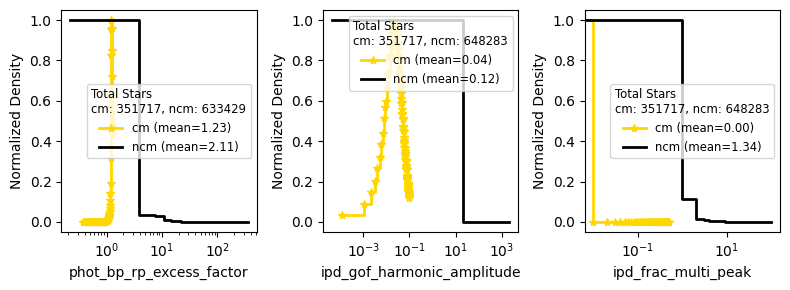

In [40]:
# List of columns to plot
columns = [
    "phot_bp_rp_excess_factor",
    "ipd_gof_harmonic_amplitude",
    "ipd_frac_multi_peak"
]

# Call the function to plot distributions
plot_distributions(columns, cm, ncm)

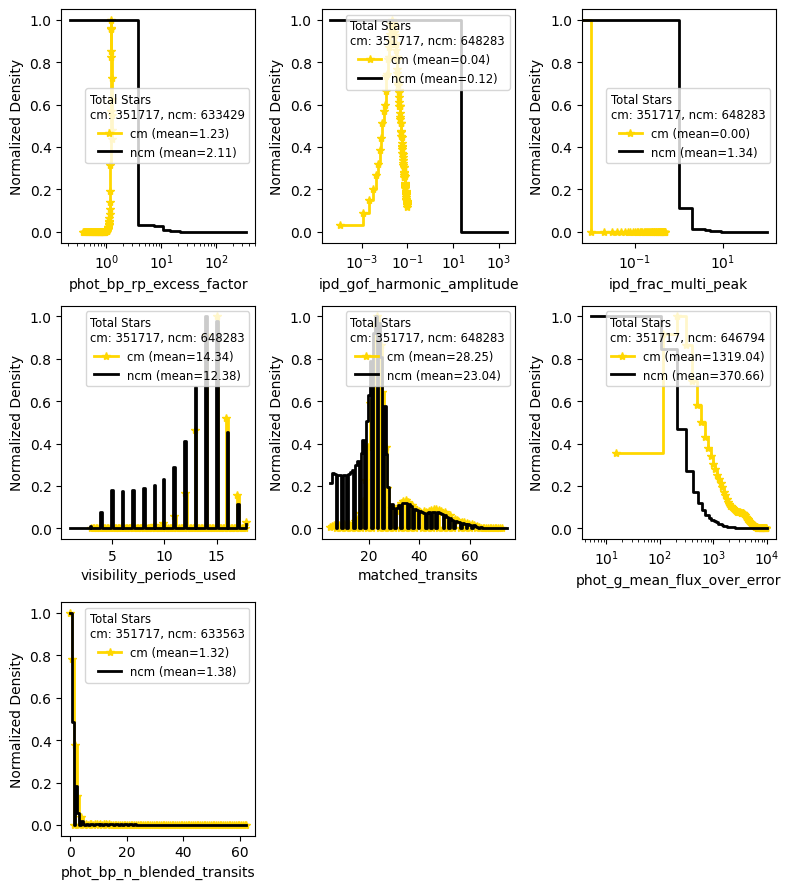

In [41]:
# List of columns to plot
columns = [
    "phot_bp_rp_excess_factor",
    "ipd_gof_harmonic_amplitude",
    "ipd_frac_multi_peak",
    "visibility_periods_used",
    "matched_transits",
    "phot_g_mean_flux_over_error",
    "phot_bp_n_blended_transits"
]

# Call the function to plot distributions
plot_distributions(columns, cm, ncm)

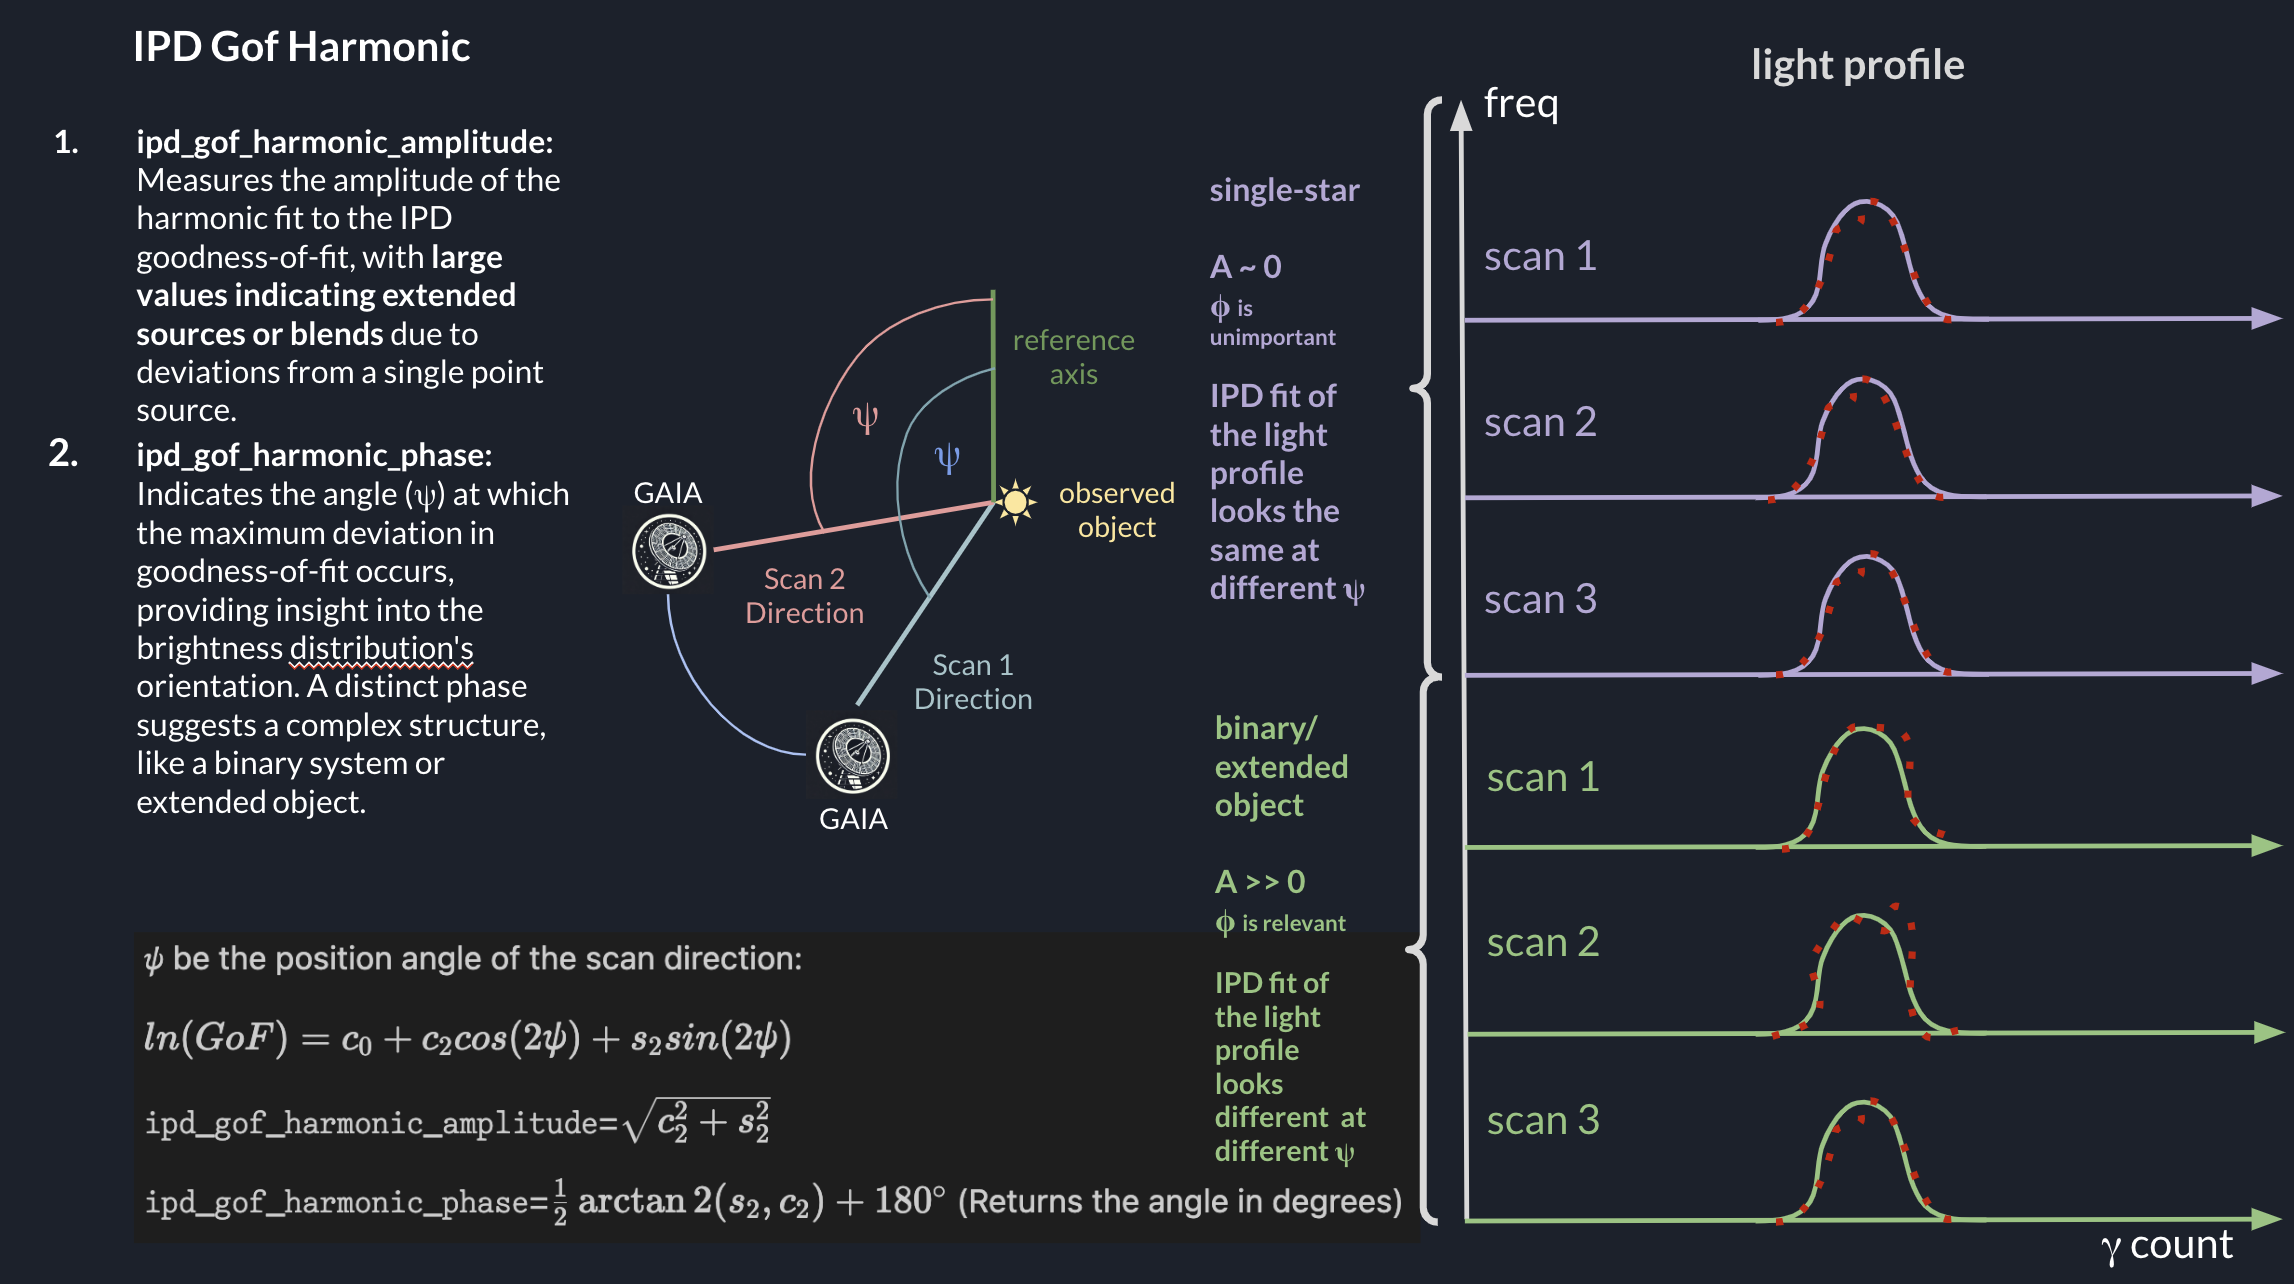

In [42]:
# Display an image from a local file with specified size
img_path = 'images/ipd.png'
display(Image(filename=img_path, width=1000, height=800))  # Adjust width and height as needed

**ipd_gof_harmonic_amplitude**: Amplitude of the IPD GoF versus position angle of scan (float) This statistic measures the amplitude of the variation of the Image Parameter Determination (IPD) goodness–of–fit (GoF; reduced chi-square) as function of the position angle of the scan direction.

**ipd_frac_multi_peak**: Percent of successful-IPD windows with more than one peak. It provides the fraction of windows (having a successful IPD result), as percentage (from 0 to 100), for which the IPD algorithm has identified a double peak, meaning that the detection may be a visually resolved double star. The higher the value the more windows it has seen a double peak.

**phot_bp_rp_excess_factor**: This factor compares the sum of the BP and RP photometric fluxes with the G-band flux. Values significantly higher than expected (usually above 1.3) can indicate issues like blending or extended emission.
Bands in Gaia Photometry:
BP Band (Blue Photometer): Sensitive to light in the blue part of the spectrum (~330–680 nm).
RP Band (Red Photometer): Sensitive to light in the red part of the spectrum (~640–1050 nm).
G-band: The Gaia mission's broad-band photometry, covering the range from approximately 330 to 1050 nm. This is a wider filter that captures both blue and red light.
In theory, since the G-band covers both blue and red wavelengths, the sum of the BP and RP fluxes should be comparable to the flux measured in the G-band.

This ratio should be close to 1, meaning the sum of the BP and RP fluxes is roughly equal to the G-band flux, with minor deviations depending on the star’s spectrum.

If > 1.3: Blending, Extended Emission, Calibration Issues

**visibility_periods_used**: A low number of visibility periods can affect the reliability of the astrometric solution, which is crucial for identifying complex sources. A high number of visibility periods suggests that the star has been well observed over a broad range of conditions and orientations. This ensures that the parallax (the apparent shift of a star due to Earth's movement) and the star's position are calculated with higher accuracy.

**astrometric_matched_transits**: The number of field–of–view transits matched to this source, counting only the transits containing CCD observations actually used to compute the astrometric solution. A low value means that fewer transits (observations when Gaia's field of view passed over the star) were matched and used to compute the astrometric solution. This could result in a less accurate measurement of the star's position, parallax, and proper motion, since the solution is based on fewer data points.

**phot_g_mean_flux_over_error**: A low flux-over-error ratio indicates poor photometric quality, possibly due to blending or variability.

**phot_bp_n_blended_transits**: Number of BP transits that contributed to the mean photometry and were flagged to be blends of more than one source (i.e. more than one source is present in the observing window). The blended sources may come from different fields of view.





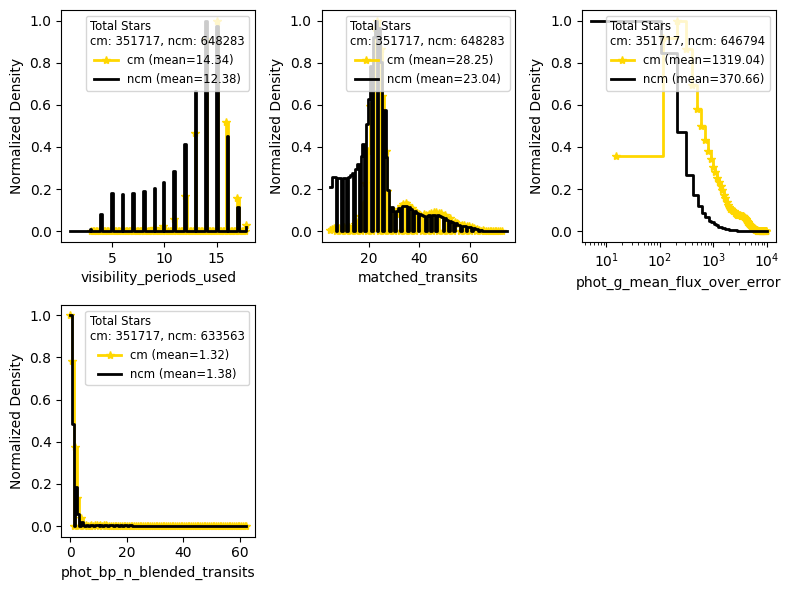

In [43]:
# List of columns to plot
columns = [
    "visibility_periods_used",
    "matched_transits",
    "phot_g_mean_flux_over_error",
    "phot_bp_n_blended_transits"
]

# Call the function to plot distributions
plot_distributions(columns, cm, ncm)

### Further Filtering

In [44]:
cm = cm[(cm["phot_g_mean_flux_over_error"] >= 50) &
            (cm["visibility_periods_used"] >= 8) &
            (cm["matched_transits"] >= 10) &
            (cm['phot_bp_n_blended_transits'] < 1)
            ]

ncm = gaia_source[~gaia_source.index.isin(cm.index)]

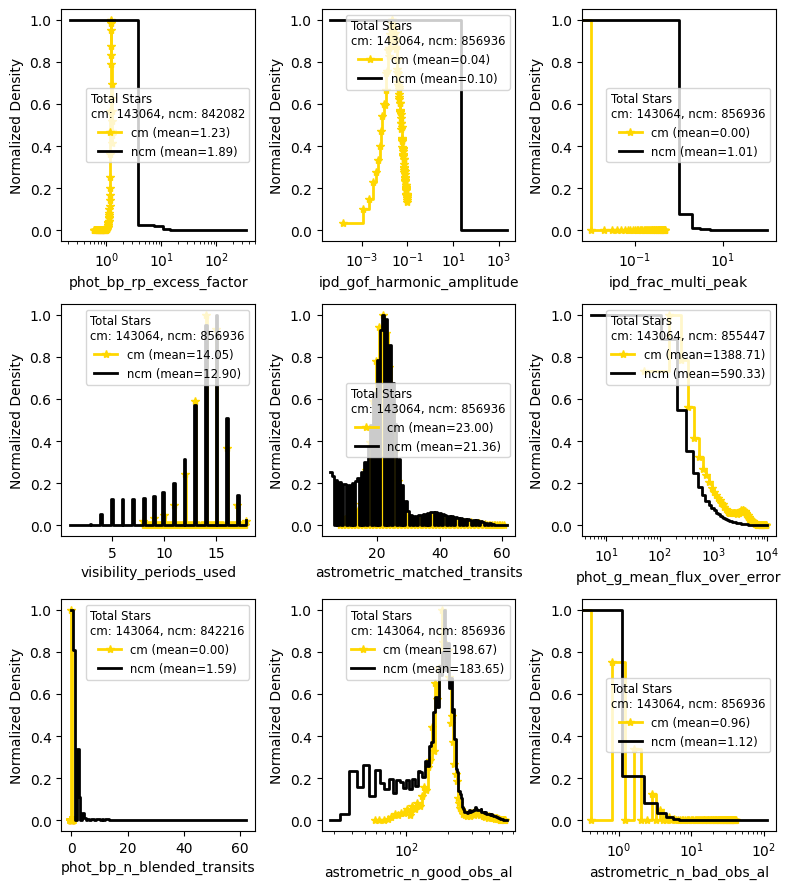

In [45]:
# List of columns to plot
columns = [
    "phot_bp_rp_excess_factor",
    "ipd_gof_harmonic_amplitude",
    "ipd_frac_multi_peak",
    "visibility_periods_used",
    "astrometric_matched_transits",
    "phot_g_mean_flux_over_error",
    "phot_bp_n_blended_transits",
    "astrometric_n_good_obs_al",
    "astrometric_n_bad_obs_al"
]

# Call the function to plot distributions
plot_distributions(columns, cm, ncm)

In [69]:
cm = cm[(cm["phot_g_mean_flux_over_error"] >= 50) &
            (cm["visibility_periods_used"] >= 8) &
            (cm["matched_transits"] >= 10) &
            (cm['phot_bp_n_blended_transits'] < 1)
            ]

ncm = gaia_source[~gaia_source.index.isin(cm.index)]

In [74]:
# keep rows where ruwe > 1.4 for ncm
ncm = ncm[ncm['ruwe'] >= 1.4]
ncm = ncm[(ncm['non_single_star'] != 0) & (ncm['non_single_star'].isna() == False)]

In [78]:
# read nss_two_body_orbit.csv
nss_two_body_orbit = pd.read_csv('nss_two_body_orbit.csv')

# make a new df with nss_two_body_orbit and ncm data combined on source_id
nss_two_body_orbit = nss_two_body_orbit.merge(ncm, on='SOURCE_ID')

figure out an information that is nss 
washington double star catalouge
bprp excess 

In [87]:
def HR_plot_2(cm, ncm):

    # Plot the Hertzsprung-Russell diagram color coded by ruwe
    plt.figure(figsize=(10, 8))
    plt.scatter(cm['bp_rp_corrected'], cm['M_G'], s=0.1, label='cm', color='#FFD700', marker='*', alpha=1)
    plt.scatter(ncm['bp_rp_corrected'], ncm['M_G'], s=0.1, label='ncm', color='k', alpha=1)

    # Invert y-axis to have bright stars at the top
    plt.gca().invert_yaxis()

    # Set plot labels and title
    plt.xlabel('(BP - RP) Corrected Color')
    plt.ylabel('M_G (Absolute G Magnitude)')
    plt.title('Hertzsprung-Russell Diagram')

    # Show the plot
    plt.show()

def correct_and_calculate(cm):
    """
    Correct for extinction and reddening, calculate distance from parallax, 
    and compute absolute magnitude M_G.
    
    Parameters:
    cm (DataFrame): A pandas DataFrame containing the columns 'phot_g_mean_mag', 
                    'ag_gspphot', 'bp_rp', 'ebpminrp_gspphot', and 'parallax'.
    
    Returns:
    DataFrame: The same DataFrame with new columns 'G_corrected', 'bp_rp_corrected', 
               'distance_pc', and 'M_G'.
    """
    # Correct for extinction and reddening
    cm['G_corrected'] = cm['phot_g_mean_mag'] - cm['ag_gspphot']
    cm['bp_rp_corrected'] = cm['bp_rp'] - cm['ebpminrp_gspphot']
    
    # Calculate distance in parsecs from parallax (parallax is in milliarcseconds)
    cm['distance_pc'] = calculate_distance(cm['parallax'])
    
    # Calculate absolute magnitude M_G
    cm['M_G'] = calculate_absolute_magnitude(cm['G_corrected'], cm['distance_pc'])
    
    return cm

In [96]:
cm = correct_and_calculate(cm)
nss_two_body_orbit = correct_and_calculate(nss_two_body_orbit)

In [98]:
nss_two_body_orbit = nss_two_body_orbit[(nss_two_body_orbit['g_luminosity_ratio'] < 0.1) & (nss_two_body_orbit['g_luminosity_ratio'].isna() == False)]

In [99]:
nss_two_body_orbit

,dec_x,period,arg_periastron,SOURCE_ID,pmdec_x,center_of_mass_velocity,nss_solution_type,t_periastron,mass_ratio,g_luminosity_ratio,ra_x,semi_amplitude_primary,inclination,pmra_x,eccentricity,solution_id,DESIGNATION,random_index,ref_epoch,ra_y,ra_error,dec_y,dec_error,parallax,parallax_error,parallax_over_error,pm,pmra_y,pmra_error,pmdec_y,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,nu_eff_used_in_astrometry,pseudocolour,pseudocolour_error,ra_pseudocolour_corr,dec_pseudocolour_corr,parallax_pseudocolour_corr,pmra_pseudocolour_corr,pmdec_pseudocolour_corr,astrometric_matched_transits,visibility_periods_used,astrometric_sigma5d_max,matched_transits,new_matched_transits,matched_transits_removed,ipd_gof_harmonic_amplitude,ipd_gof_harmonic_phase,ipd_frac_multi_peak,ipd_frac_odd_win,ruwe,scan_direction_strength_k1,scan_direction_strength_k2,scan_direction_strength_k3,scan_direction_strength_k4,scan_direction_mean_k1,scan_direction_mean_k2,scan_direction_mean_k3,scan_direction_mean_k4,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_bp_n_contaminated_transits,phot_bp_n_blended_transits,phot_rp_n_contaminated_transits,phot_rp_n_blended_transits,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_method_used,rv_nb_transits,rv_nb_deblended_transits,rv_visibility_periods_used,rv_expected_sig_to_noise,rv_renormalised_gof,rv_chisq_pvalue,rv_time_duration,rv_amplitude_robust,rv_template_teff,rv_template_logg,rv_template_fe_h,rv_atm_param_origin,vbroad,vbroad_error,vbroad_nb_transits,grvs_mag,grvs_mag_error,grvs_mag_nb_transits,rvs_spec_sig_to_noise,phot_variable_flag,l,b,ecl_lon,ecl_lat,in_qso_candidates,in_galaxy_candidates,non_single_star,has_xp_continuous,has_xp_sampled,has_rvs,has_epoch_photometry,has_epoch_rv,has_mcmc_gspphot,has_mcmc_msc,in_andromeda_survey,classprob_dsc_combmod_quasar,classprob_dsc_combmod_galaxy,classprob_dsc_combmod_star,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,azero_gspphot,azero_gspphot_lower,azero_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,ebpminrp_gspphot,ebpminrp_gspphot_lower,ebpminrp_gspphot_upper,libname_gspphot,G_corrected,bp_rp_corrected,distance_pc,M_G
122,NaN,0.48679,0.0,42350374700875264,NaN,NaN,EclipsingBinary,-0.049211,NaN,0.003628,NaN,NaN,63.312753,NaN,0.0,1636148068921376768,Gaia DR3 42350374700875264,227859398,2016.0,53.122828,0.020944,15.424346,0.016226,0.543827,0.023102,23.540007,3.400748,-0.874892,0.028743,-3.286282,0.020047,-0.054734,0.217003,0.098639,-0.081644,-0.308526,-0.121477,0.26604,0.088522,-0.046444,-0.10005,206,0,203,3,8.995813,436.83429,0.098172,4.748016,31,True,1.48298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,15,0.040119,53,6,0,0.055866,162.730591,0,0,1.482653,0.268366,0.312993,0.420627,0.667287,-77.192963,-6.789799,-42.235611,30.867264,False,450,62932.480536,91.830856,685.308655,13.69018,49,28971.886149,196.313461,147.579727,14.1836,50,49066.578006,166.512115,294.672729,13.020931,1.240035,0.0,1.0,0.0,1.0,0.0,1.162669,0.493421,0.669249,2.763064,5.057095,2.0,9.0,2.0,8.0,7.568014,NaN,NaN,891.249756,NaN,5750.0,4.0,-0.25,222.0,NaN,NaN,NaN,12.713295,0.054137,7.0,NaN,VARIABLE,170.370444,-32.235268,54.575611,-3.595496,False,False,4,False,False,Fals

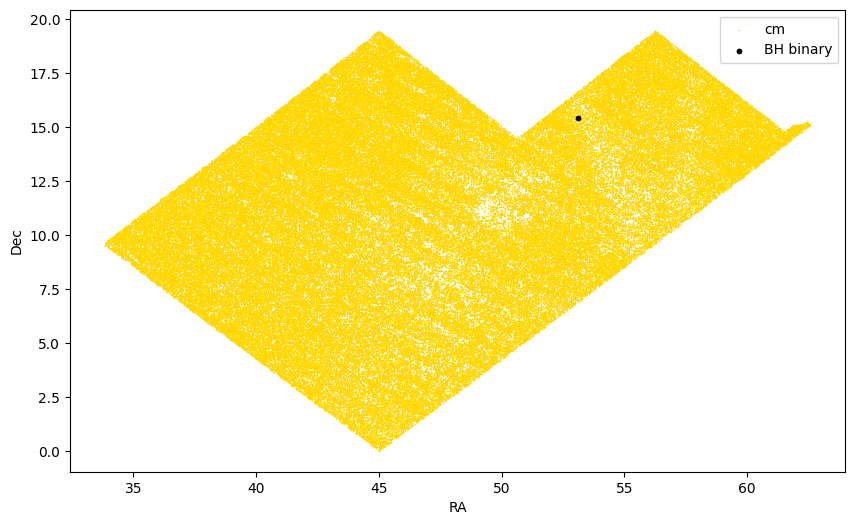

In [103]:
# plot cm and ncm on the sky
plt.figure(figsize=(10, 6))
plt.scatter(cm['ra'], cm['dec'], s=0.001, label='cm', color='#FFD700', marker='*')  # Gold color
plt.scatter(nss_two_body_orbit['ra_y'], nss_two_body_orbit['dec_y'], s=10, label='BH binary', color='k')  # Black color
plt.xlabel('RA')
plt.ylabel('Dec')
plt.legend()
plt.show()